In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Popularidad palabra CupCake en google

Los datos seleccionados corresponden a la serie de Google Trends CupCake, la cual mide la popularidad de Cupcake a nivel mundial en cuanto a tendencias de google (búsquedas de ese término en el motor de Google por los usuarios de internet). La variable de respuesta mide la popularidad por cada mes en una escala de 0 a 100, siendo este último el valor de mayor popularidad que obtuvo la palabra en una fecha específica.

El rango de fechas del data set va desde el enero de 2004 hasta eljulio  de 2021

https://trends.google.com/trends/explore?q=%2Fm%2F03p1r4&date=all

In [61]:
plt.style.use('classic')

In [4]:
df = pd.read_csv('multiTimeline.csv',skiprows=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 211 non-null    object
 1   Cupcake: (Worldwide)  211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df.columns = ['month', 'cupcake']

In [10]:
df.head()

,month,cupcake
0,2004-01,5
1,2004-02,7
2,2004-03,7
3,2004-04,5
4,2004-05,6


In [11]:
df.month = pd.to_datetime(df['month'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    211 non-null    datetime64[ns]
 1   cupcake  211 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [15]:
df.set_index('month', inplace=True)

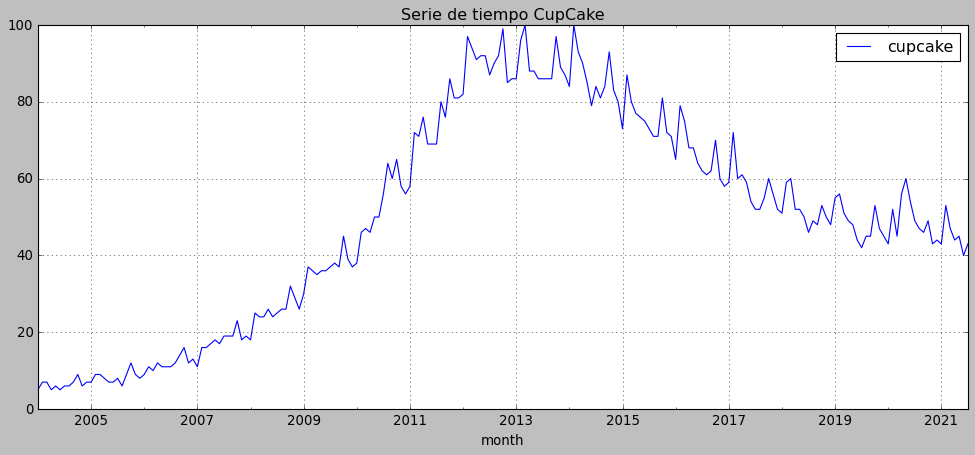

In [30]:
df.plot(figsize=(15,6), title='Serie de tiempo CupCake', grid=True);

# Prueba de estacionalidad

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
adfuller(df)

(-2.0124889103607613,
 0.28112413700934324,
 13,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 1056.3588955686812)

Dado que el p_value es > 0.05 (0.28) , no se rechaza H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente igual a 0 -> La serie no es estacionaria.

# Análisis de componente estacionario (Seasonal Patterns)

Se evalúa si el componente estacionario de la serie (diferencia de un periodo) es o no estacionario

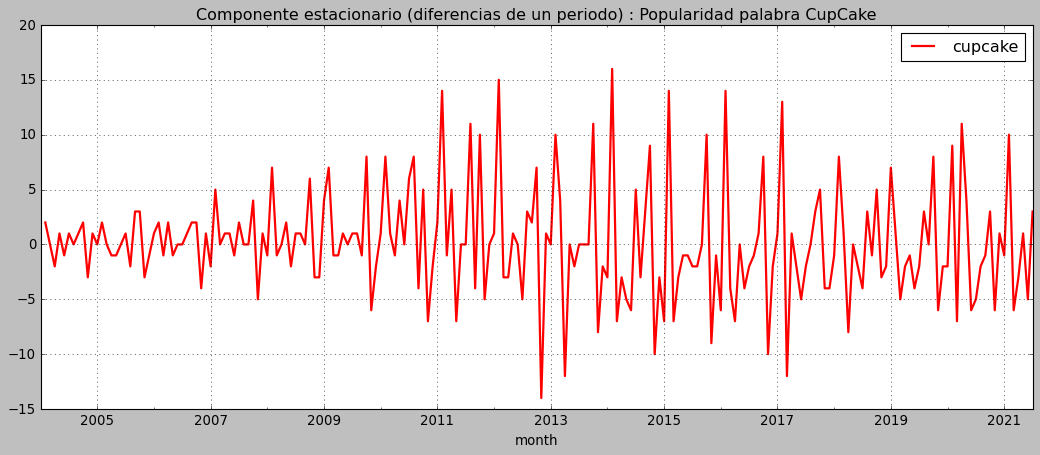

In [89]:
df.diff().plot(figsize=(16,6), title='Componente estacionario (diferencias de un periodo) : Popularidad palabra CupCake',
              grid=True, linewidth=2, color='red');

In [42]:
df_dif = df.diff()

In [44]:
adfuller(df_dif.iloc[1:])

(-1.6565129824623277,
 0.4536459642096927,
 12,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 1054.16906946182)

In [59]:
res = []
c_val = ["c","ct","ctt","nc"]

for i in c_val:
    res.append( adfuller(df_dif.iloc[1:], regression=i )[1] )
    
pd.DataFrame(index=c_val, data=res, columns=['p_value'])

,p_value
c,0.453646
ct,0.481453
ctt,0.760177
nc,0.089501


In [47]:
res

[0.7601766958955527,
 0.48145347083097845,
 0.4536459642096927,
 0.08950069930309479]

In [56]:
pd.DataFrame(data = res, index=["c","ct","ctt","nc"])

,0
c,0.760177
ct,0.481453
ctt,0.453646
nc,0.089501


# Construct and plot the trend component of the time series

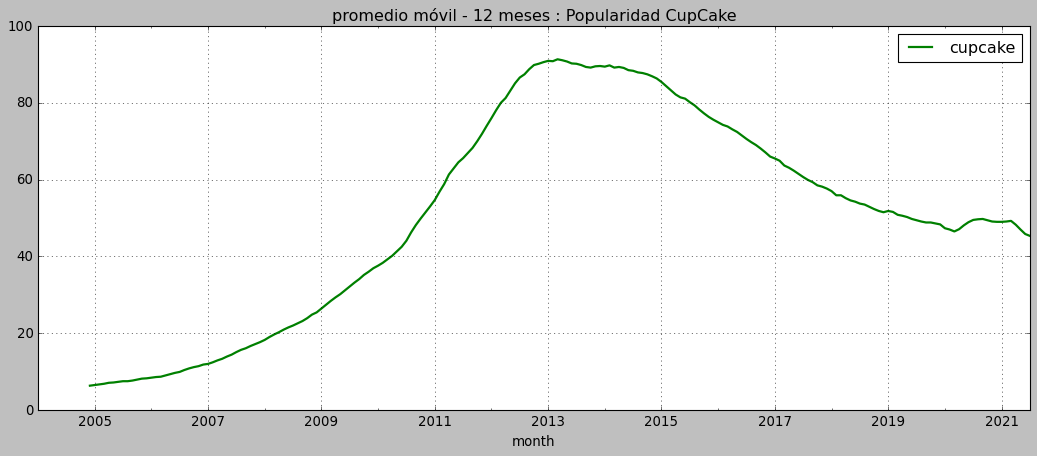

In [90]:
df.rolling(12).mean().plot(figsize=(16,6), title='promedio móvil - 12 meses : Popularidad CupCake', grid=True,
                          linewidth=2, color='green');

In [72]:
df

,cupcake
month,
2004-01-01,5
2004-02-01,7
2004-03-01,7
2004-04-01,5
2004-05-01,6
...,...
2021-03-01,47
2021-04-01,44
2021-05-01,45


# Construct a plot to analyze the autocorrelation

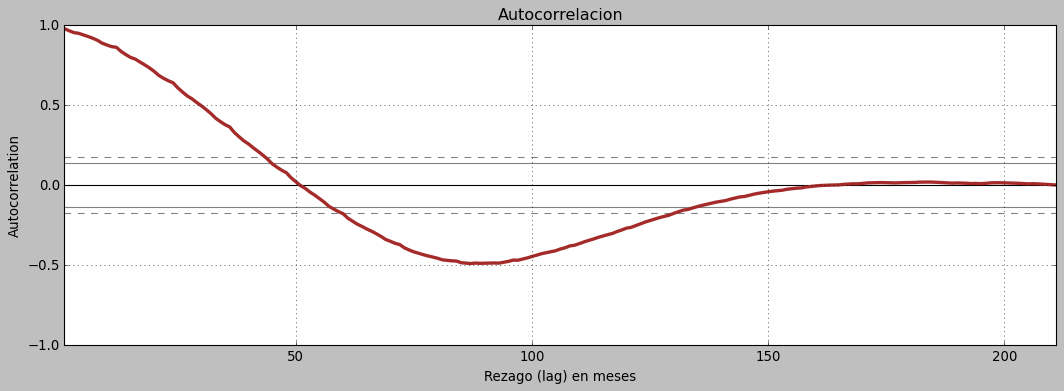

In [104]:
plt.figure(figsize=(16,5))
pd.plotting.autocorrelation_plot(df,linewidth=3, color='brown')
plt.title('Autocorrelacion')
plt.xlabel('Rezago (lag) en meses');